# Q1

## Generating dataset
- conforms to classic univariate regression model
- 999 observations
- normal error term
- positive coefficient

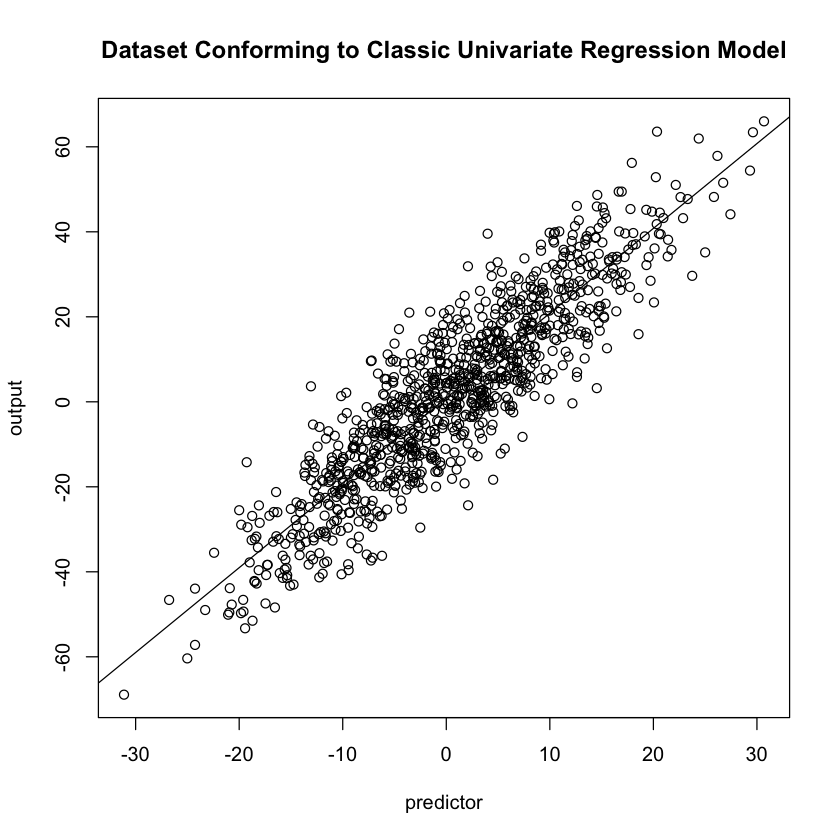

In [2]:
x = rnorm(999,0,10)
y = 2*x + rnorm(999,0,10)
data = data.frame(x,y)

plot(data$x,data$y, main = "Dataset Conforming to Classic Univariate Regression Model", xlab = "predictor", ylab="output")
fit1 = lm(y ~ x)
abline(fit1)

In [3]:
summary(fit1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.4411  -7.1012   0.0727   6.5113  30.6960 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.88857    0.30959    2.87  0.00419 ** 
x            1.99593    0.03142   63.52  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.772 on 997 degrees of freedom
Multiple R-squared:  0.8019,	Adjusted R-squared:  0.8017 
F-statistic:  4035 on 1 and 997 DF,  p-value: < 2.2e-16


## Addding Outlier
- slope of regression line should become negative

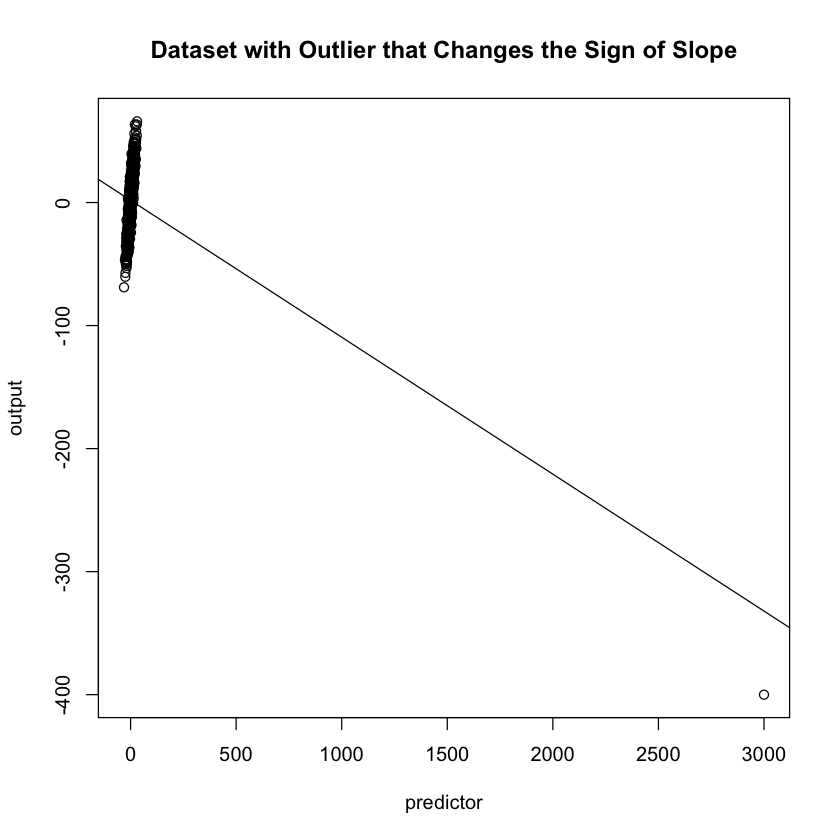

In [4]:
data = rbind(data,c(3000,-400))
plot(data$x,data$y,main="Dataset with Outlier that Changes the Sign of Slope",xlab="predictor",ylab="output")
fit2 = lm(data$y ~ data$x)
abline(fit2)

In [5]:
summary(fit2)


Call:
lm(formula = data$y ~ data$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.254 -15.817   0.284  15.399  67.531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.880112   0.728777    2.58     0.01 *  
data$x      -0.111309   0.007641  -14.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.03 on 998 degrees of freedom
Multiple R-squared:  0.1754,	Adjusted R-squared:  0.1745 
F-statistic: 212.2 on 1 and 998 DF,  p-value: < 2.2e-16


## Difference Between Regression with and without Outlier 

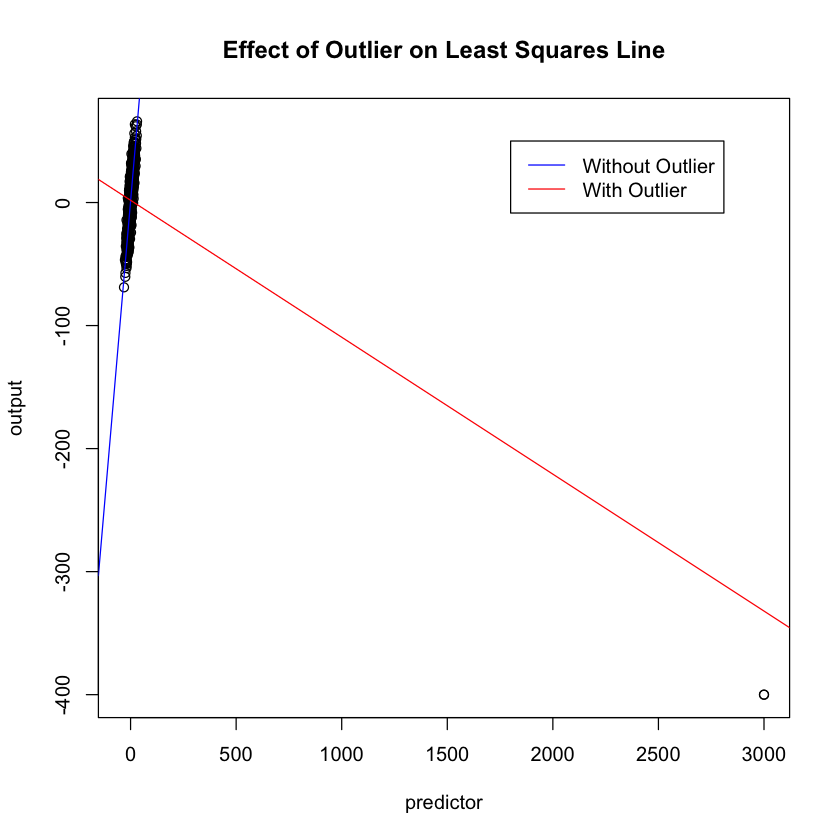

In [6]:
data = rbind(data,c(3000,-400))
plot(data$x,data$y,main="Effect of Outlier on Least Squares Line",xlab="predictor",ylab="output")
abline(fit1,col="blue")
abline(fit2,col="red")
legend(1800, 50, legend=c("Without Outlier", "With Outlier"),
       col=c("blue","red"), lty=1:1)





## Interpretation

This dataset demonstrates how sensitive least square lines (the method most regressions are based on) are to high leverage observations. 

Specifically, least square lines are disproportionately affected by observations that fall far outside the normal range (outliers). 

This means that a least squares line can be heavily affected by very few outlier observations, which can invalidate the entire fit.

__________________

# Q2

## Getting and Understanding Lalonde dataset

In [7]:
library(arm)
library(Matching)
data(lalonde)
dim(lalonde)
summary(lalonde)

Loading required package: MASS
Loading required package: Matrix
Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/michelleslee/Documents/code/DataScience

## 
##  Matching (Version 4.9-3, Build Date: 2018-05-03)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



[1] 445  12

      age             educ          black             hisp        
 Min.   :17.00   Min.   : 3.0   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:20.00   1st Qu.: 9.0   1st Qu.:1.0000   1st Qu.:0.00000  
 Median :24.00   Median :10.0   Median :1.0000   Median :0.00000  
 Mean   :25.37   Mean   :10.2   Mean   :0.8337   Mean   :0.08764  
 3rd Qu.:28.00   3rd Qu.:11.0   3rd Qu.:1.0000   3rd Qu.:0.00000  
 Max.   :55.00   Max.   :16.0   Max.   :1.0000   Max.   :1.00000  
    married           nodegr           re74              re75      
 Min.   :0.0000   Min.   :0.000   Min.   :    0.0   Min.   :    0  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:    0.0   1st Qu.:    0  
 Median :0.0000   Median :1.000   Median :    0.0   Median :    0  
 Mean   :0.1685   Mean   :0.782   Mean   : 2102.3   Mean   : 1377  
 3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:  824.4   3rd Qu.: 1221  
 Max.   :1.0000   Max.   :1.000   Max.   :39570.7   Max.   :25142  
      re78            u74              u75             

## Isolating and Understanding The Control Group

In [8]:
lalonde_control = lalonde[lalonde$treat==0,]
dim(lalonde_control)
summary(lalonde_control)

[1] 260  12

      age             educ           black             hisp       
 Min.   :17.00   Min.   : 3.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:19.00   1st Qu.: 9.00   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :24.00   Median :10.00   Median :1.0000   Median :0.0000  
 Mean   :25.05   Mean   :10.09   Mean   :0.8269   Mean   :0.1077  
 3rd Qu.:28.00   3rd Qu.:11.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :55.00   Max.   :14.00   Max.   :1.0000   Max.   :1.0000  
    married           nodegr            re74              re75        
 Min.   :0.0000   Min.   :0.0000   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:    0.0   1st Qu.:    0.0  
 Median :0.0000   Median :1.0000   Median :    0.0   Median :    0.0  
 Mean   :0.1538   Mean   :0.8346   Mean   : 2107.0   Mean   : 1266.9  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:  139.4   3rd Qu.:  650.1  
 Max.   :1.0000   Max.   :1.0000   Max.   :39570.7   Max.   :23032.0  
      re78            u74         

## Fitting a Linear Model Predicting re78

In [9]:
mod1 = lm( re78 ~ age+educ+re74+re75+I(educ*re74)+I(educ*re75)+I(age*re74)+I(age*re75)+I(age*age)+I(re74*re75), data=lalonde_control)
summary(mod1)


Call:
lm(formula = re78 ~ age + educ + re74 + re75 + I(educ * re74) + 
    I(educ * re75) + I(age * re74) + I(age * re75) + I(age * 
    age) + I(re74 * re75), data = lalonde_control)

Residuals:
   Min     1Q Median     3Q    Max 
 -7118  -4063  -1733   2867  33799 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     6.433e+03  4.131e+03   1.557   0.1207  
age            -2.339e+02  2.787e+02  -0.839   0.4020  
educ            8.700e+01  2.360e+02   0.369   0.7126  
re74           -2.108e-02  4.793e-01  -0.044   0.9649  
re75            8.699e-01  1.882e+00   0.462   0.6443  
I(educ * re74)  3.494e-02  6.675e-02   0.523   0.6011  
I(educ * re75) -7.839e-02  1.344e-01  -0.583   0.5601  
I(age * re74)  -5.487e-03  2.784e-02  -0.197   0.8439  
I(age * re75)   9.048e-03  4.214e-02   0.215   0.8302  
I(age * age)    3.939e+00  4.567e+00   0.863   0.3892  
I(re74 * re75) -2.369e-05  1.417e-05  -1.672   0.0958 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

In [10]:
sim_results@coef[1,9]

ERROR: Error in eval(expr, envir, enclos): object 'sim_results' not found


## Simulating 95% Confidence Intervals for Each Age

In [11]:
# simulating
set.seed(1)
sim_results <- sim(mod1, n.sims = 10000)

# sanity check
mean(sim_results@coef[,1])

[1] 6452.767

In [12]:
# setting median values
educ_m = median(lalonde_control$educ)
re74_m = median(lalonde_control$re74)
re75_m = median(lalonde_control$re75)


In [13]:
# setting 75th percentile values
educ_75p = quantile(lalonde_control$educ,c(.75))
re74_75p = quantile(lalonde_control$re74,c(.75))
re75_75p = quantile(lalonde_control$re75,c(.75))

In [14]:
# helper functions to get expected re78 
## based on coefficients and predictors
get_re78 <- function(coefs, person) {
  res <- coefs[1] + person[1]*coefs[2] +
    person[2]*coefs[3] +
    person[3]*coefs[4] + 
    person[4]*coefs[5] +
    person[5]*coefs[6] +
    person[6]*coefs[7] +
    person[7]*coefs[8] +
    person[8]*coefs[9] +
    person[9]*coefs[10]+
    person[10]*coefs[11]
  
  return(res)
}

In [1]:
a = c(1,2,3,4)
b = c(5,6,7,8)

a*b

[1]  5 12 21 32

In [15]:
# creating empty storage matrix
## with a row for each simulated coefficient
## and a col for each age
storage.expected_med <- matrix(NA, nrow = 10000, ncol = 39)

# for each age
for (age in c(17:55)) {
  # for each simulated set of coefficients
  for (i in 1:10000)
  {
    # for a person who has the median value on all other variables
    med_person <- c(age, educ_m, re74_m, re75_m,educ_m*re74_m,educ_m*re75_m,age*re74_m,age*re75_m,age*age,re74_m*re75_m)
    # store their expected re78
    storage.expected_med[i, age - 16] <- get_re78(sim_results@coef[i, ], med_person)
  }
}

In [16]:
# creating empty storage matrix
## with a row for each simulated coefficient
## and a col for each age
storage.expected_75p <- matrix(NA, nrow = 10000, ncol = 39)

# for each age
for (age in c(17:55)) {
  # for each simulated set of coefficients
  for (i in 1:10000)
  {
    # for a person who has the 75 percentile value on all other variables
    q75_person <- c(age, educ_75p, re74_75p, re75_75p,educ_75p*re74_75p,educ_75p*re75_75p,age*re74_75p,age*re75_75p,age*age,re74_75p*re75_75p)
    # store their expected re78
    storage.expected_75p[i, age - 16] <- get_re78(sim_results@coef[i, ], q75_person)
  }
}

In [17]:
# creating empty storage matrix
## with a row for each simulated coefficient
## and a col for each age
storage.predicted_med <- matrix(NA, nrow = 10000, ncol = 39)

# for each age
for (age in c(17:55)) {
# for each simulated set of coefficients
  for (i in 1:10000)
  {
    # for a person who has the median value on all other variables
    med_person <- c(age, educ_m, re74_m, re75_m,educ_m*re74_m,educ_m*re75_m,age*re74_m,age*re75_m,age*age,re74_m*re75_m)
    # store their expected re78
    storage.predicted_med[i, age - 16] <- get_re78(sim_results@coef[i, ], med_person) + rnorm(1, 0, sim_results@sigma[i])
  }
}

In [18]:
# creating empty storage matrix
## with a row for each simulated coefficient
## and a col for each age
storage.predicted_75p <- matrix(NA, nrow = 10000, ncol = 39)

# for each age
for (age in c(17:55)) {
# for each simulated set of coefficients
  for (i in 1:10000)
  {
    # for a person who has the 75 percentile value on all other variables
    q75_person <- c(age, educ_75p, re74_75p, re75_75p,educ_75p*re74_75p,educ_75p*re75_75p,age*re74_75p,age*re75_75p,age*age,re74_75p*re75_75p)
    # store their expected re78
    storage.predicted_75p[i, age - 16] <- get_re78(sim_results@coef[i, ], q75_person) + rnorm(1, 0, sim_results@sigma[i])
  }
}

In [19]:
# getting 95% confidence intervals for each age
## for each of our created storage matrices

CI.expected_med <- apply(storage.expected_med, 2, quantile, probs = c(0.05, 0.95))
CI.expected_75p <- apply(storage.expected_75p, 2, quantile, probs = c(0.05, 0.95))
CI.predicted_med <- apply(storage.predicted_med, 2, quantile, probs = c(0.05, 0.95))
CI.predicted_75p <- apply(storage.predicted_75p, 2, quantile, probs = c(0.05, 0.95))


In [20]:
sim_results@coef[1,]

(Intercept)            age           educ           re74           re75 
  1.210204e+04  -3.504578e+02  -3.238915e+02  -6.674384e-01   3.221316e+00 
I(educ * re74) I(educ * re75)  I(age * re74)  I(age * re75)   I(age * age) 
 -1.501068e-03  -2.345083e-01   3.748766e-02  -2.644525e-02   6.349777e+00 
I(re74 * re75) 
 -3.239880e-05

In [25]:
print(CI.expected_med)

        [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
5%  3313.244 3367.685 3393.302 3402.121 3399.538 3361.426 3304.351 3232.895
95% 5646.001 5393.680 5170.994 4988.954 4854.186 4763.106 4711.663 4684.506
        [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
5%  3155.520 3086.093 3021.586 2958.771 2899.970 2856.575 2836.490 2830.501
95% 4678.688 4693.951 4719.410 4737.804 4770.504 4804.733 4838.216 4889.764
       [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]
5%  2813.133 2815.203 2811.881 2810.311 2809.329 2825.244 2822.104 2820.296
95% 4937.264 5005.035 5077.481 5156.654 5254.999 5382.610 5511.027 5670.738
       [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]
5%  2809.952 2784.021 2739.286 2701.101 2641.632 2576.795 2493.660 2406.233
95% 5871.063 6088.012 6323.906 6580.767 6866.869 7174.427 7517.222 7867.387
       [,33]    [,34]    [,35]    [,36]     [,37]     [,38]     [,39]
5%  2302.042 2185.

In [26]:
print(CI.expected_75p)

        [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
5%  3412.861 3480.967 3524.525 3560.175 3569.204 3556.964 3519.945 3473.043
95% 5975.893 5721.460 5500.087 5322.394 5189.108 5080.186 5012.389 4974.724
        [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
5%  3416.913 3359.984 3303.110 3250.808 3207.281 3174.981 3153.897 3135.415
95% 4958.989 4956.225 4975.502 5004.699 5039.365 5072.949 5124.863 5186.245
       [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]
5%  3124.001 3113.744 3119.792 3120.159 3124.496 3131.243 3139.048 3114.210
95% 5244.840 5320.580 5399.992 5494.106 5596.011 5730.136 5873.147 6056.894
       [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]
5%  3113.157 3082.047 3046.300 2997.873 2932.402 2861.795 2777.557 2693.234
95% 6258.929 6494.510 6743.764 7010.752 7312.132 7641.066 7995.027 8378.960
       [,33]    [,34]    [,35]     [,36]     [,37]     [,38]     [,39]
5%  2580.167 2465

In [27]:
print(CI.predicted_med)

         [,1]      [,2]      [,3]     [,4]     [,5]      [,6]      [,7]
5%  -4530.734 -4581.733 -4884.689 -5212.83 -5218.88 -5033.765 -5155.924
95% 13619.883 13492.672 13561.231 13166.56 13291.69 13159.400 13070.995
        [,8]      [,9]    [,10]     [,11]     [,12]    [,13]     [,14]
5%  -5021.36 -5113.719 -5184.32 -5325.673 -5352.319 -5391.00 -5365.704
95% 13130.95 13000.778 12920.81 13079.959 13109.381 12843.59 12933.483
        [,15]     [,16]     [,17]     [,18]     [,19]    [,20]     [,21]
5%  -5336.136 -5461.127 -5182.993 -5093.437 -5276.351 -5144.55 -5070.244
95% 12857.023 13061.425 12924.043 13028.094 13038.326 13063.14 13321.061
        [,22]     [,23]     [,24]     [,25]     [,26]     [,27]     [,28]
5%  -5063.549 -5042.365 -4881.264 -4976.677 -4825.278 -4773.141 -4578.039
95% 13310.409 13315.318 13554.747 13585.547 13590.514 13898.669 13891.111
        [,29]     [,30]     [,31]     [,32]     [,33]     [,34]     [,35]
5%  -4571.857 -4436.796 -4511.791 -4468.006 -4198.335 -4

In [28]:
print(CI.predicted_75p)

         [,1]      [,2]      [,3]     [,4]     [,5]      [,6]      [,7]
5%  -4626.775 -4475.138 -4480.252 -4721.53 -4606.59 -4821.705 -4964.304
95% 13969.760 13954.855 13751.177 13586.11 13486.89 13437.657 13304.427
         [,8]      [,9]     [,10]     [,11]     [,12]     [,13]     [,14]
5%  -4863.982 -4952.015 -5204.846 -5152.331 -4906.096 -5085.149 -4940.555
95% 13264.692 13330.356 13220.201 13398.463 13024.698 13161.282 13380.815
        [,15]     [,16]    [,17]     [,18]     [,19]    [,20]     [,21]
5%  -5000.467 -4840.498 -5279.23 -5124.476 -5021.332 -4873.89 -4762.169
95% 13266.943 13234.386 13239.15 13226.899 13201.494 13453.96 13686.310
        [,22]     [,23]     [,24]     [,25]     [,26]    [,27]     [,28]
5%  -4934.508 -4724.254 -4558.526 -4485.473 -4359.724 -4252.32 -4385.059
95% 13584.678 13695.214 13707.781 13923.285 14046.802 14281.45 14371.792
        [,29]     [,30]     [,31]     [,32]     [,33]     [,34]     [,35]
5%  -4095.746 -4203.472 -4139.572 -3820.296 -3929.985

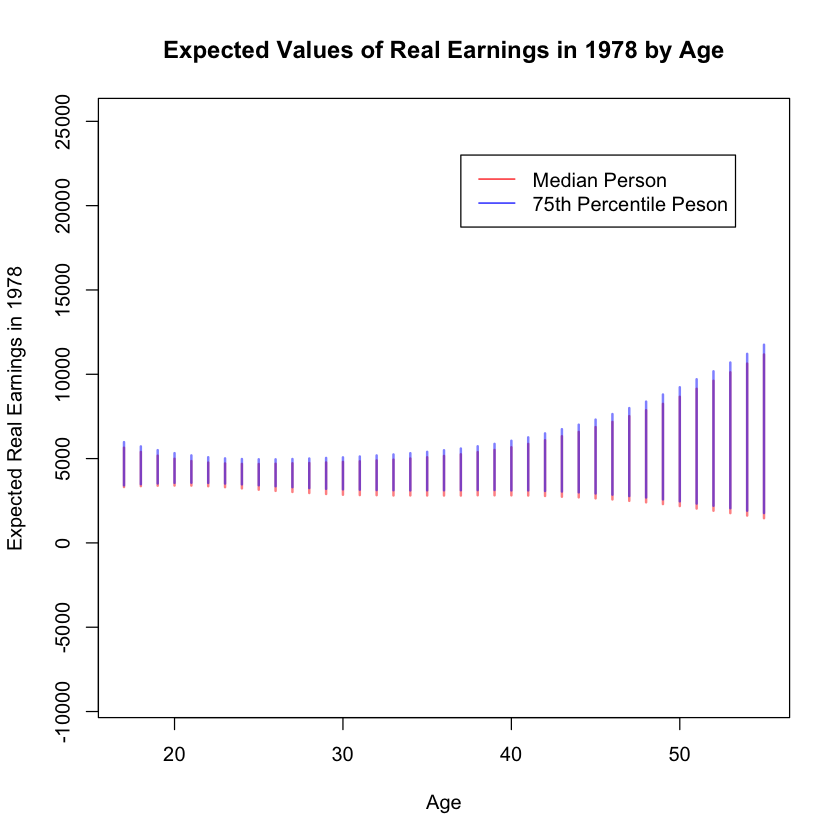

In [215]:
# plotting our confidence intervals for expected values as line segments.


plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,55), ylim = c(-9000,25000), 
     main = "Expected Values of Real Earnings in 1978 by Age", xlab = "Age", 
     ylab = "Expected Real Earnings in 1978")

legend(37, 23000, legend=c("Median Person", "75th Percentile Peson"),
       col=c("red","blue"), lty=1:1)


for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.expected_med[1, age - 16],
    x1 = age,
    y1 = CI.expected_med[2, age - 16],
    lwd = 2,
    col = rgb(1,0,0,.5)) # red, translucent
}

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.expected_75p[1, age - 16],
    x1 = age,
    y1 = CI.expected_75p[2, age - 16],
    lwd = 2,
    col = rgb(0,0,1,.5)) # blue, translucent
}

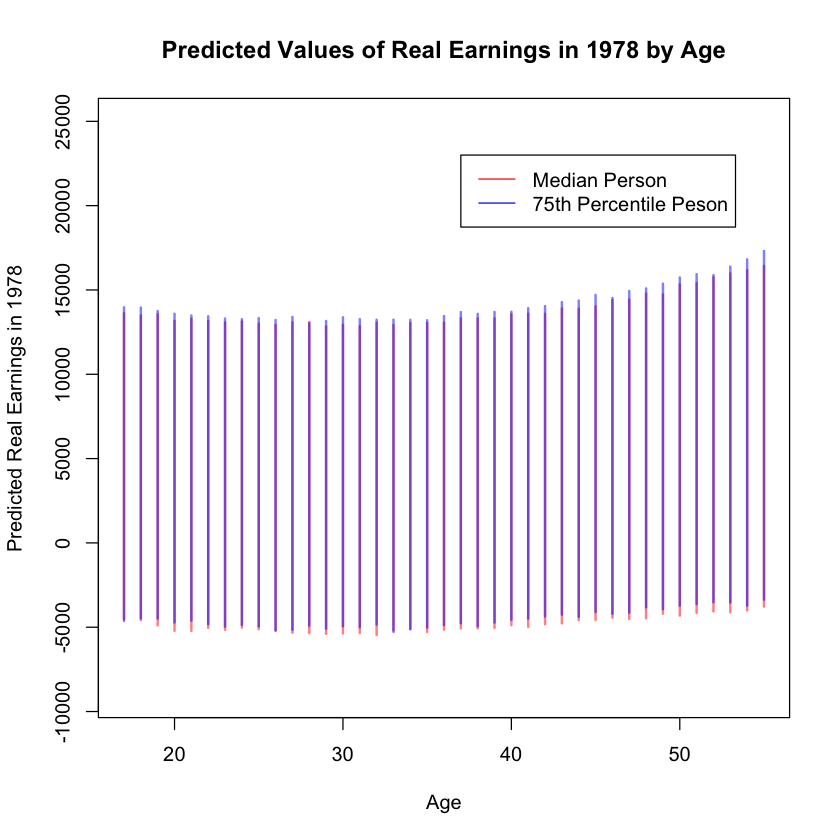

In [216]:
# plotting our confidence intervals for predicted values as line segments.


plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,55), ylim = c(-9000,25000), 
     main = "Predicted Values of Real Earnings in 1978 by Age", xlab = "Age", 
     ylab = "Predicted Real Earnings in 1978")

legend(37, 23000, legend=c("Median Person", "75th Percentile Peson"),
       col=c("red","blue"), lty=1:1)

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.predicted_med[1, age - 16],
    x1 = age,
    y1 = CI.predicted_med[2, age - 16],
    lwd = 2,
    col = rgb(1,0,0,.5)) # red, translucent
}

for (age in 17:55) {
  segments(
    x0 = age,
    y0 = CI.predicted_75p[1, age - 16],
    x1 = age,
    y1 = CI.predicted_75p[2, age - 16],
    lwd = 2,
    col = rgb(0,0,1,.5)) # blue, translucent
}

## Interpretation

The values for a median person and 75th percentile person almost completely overlap, indicating that these values have low variance.

Expected re78 has a rather consistent lower bound while the upper bound decreases mildly until the early twenties then increases exponentially.

In contrast, predicted re78 shows much less changes in range, but it generally also decreases slightly until the early twenties and increases linearly afterwards.  

Thus, while there does seem to be an effect on age on the probable upper bound of re78, this effect is rather insignificant after considering the variance in re78 unaccounted for in our model.

__________________

# Q3

## Getting, Modifying, and Understanding Plant Growth Dataset

In [33]:
library(datasets)
print('Removing all trt2 obsevarions...')
PG_noT2 = PlantGrowth[PlantGrowth$group != "trt2",]
paste('removed', dim(PlantGrowth)[1]-dim(PG_noT2)[1], 'items')

print('Converting treatment into dummy vars...')
Treat1=ifelse(PG_noT2$group =="trt1",1,0)
PG_noT2 = data.frame(PG_noT2,Treat1)
head(PG_noT2)
dim(PG_noT2)
summary(PG_noT2)

[1] "Removing all trt2 obsevarions..."


[1] "removed 10 items"

[1] "Converting treatment into dummy vars..."


weight,group,Treat1
4.17,ctrl,0
5.58,ctrl,0
5.18,ctrl,0
6.11,ctrl,0
4.50,ctrl,0
4.61,ctrl,0


[1] 20  3

     weight       group        Treat1   
 Min.   :3.590   ctrl:10   Min.   :0.0  
 1st Qu.:4.388   trt1:10   1st Qu.:0.0  
 Median :4.750   trt2: 0   Median :0.5  
 Mean   :4.846             Mean   :0.5  
 3rd Qu.:5.218             3rd Qu.:1.0  
 Max.   :6.110             Max.   :1.0  

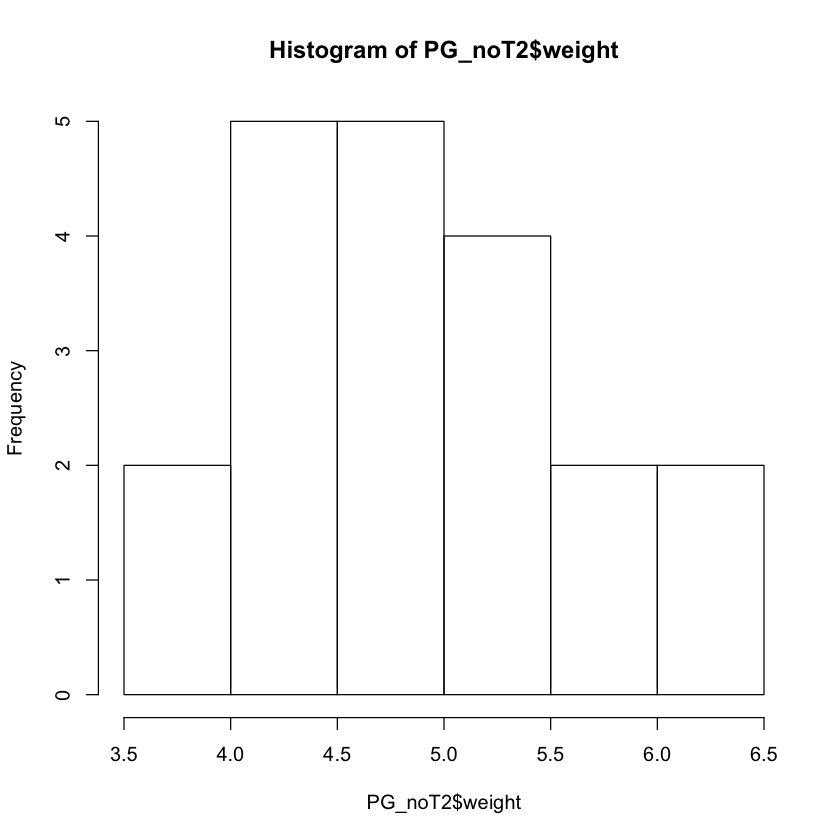

In [34]:
hist(PG_noT2$weight)

## Bootstrapping Coefficients

In [42]:
B = 1000 ## number of bootstraps
n = length(PG_noT2$weight)

CI_boots = matrix(NA, B, 2) ## vector to hold results
for(b in 1:B){
    i = sample(x = 1:n, size = n, replace = TRUE) ## sample indices
    bootSample = PG_noT2[i,] ## get data 
    CI_boots[b,1] = summary(lm(weight~Treat1,data=bootSample))$coef[1]
    CI_boots[b,2] = summary(lm(weight~Treat1,data=bootSample))$coef[2]

}

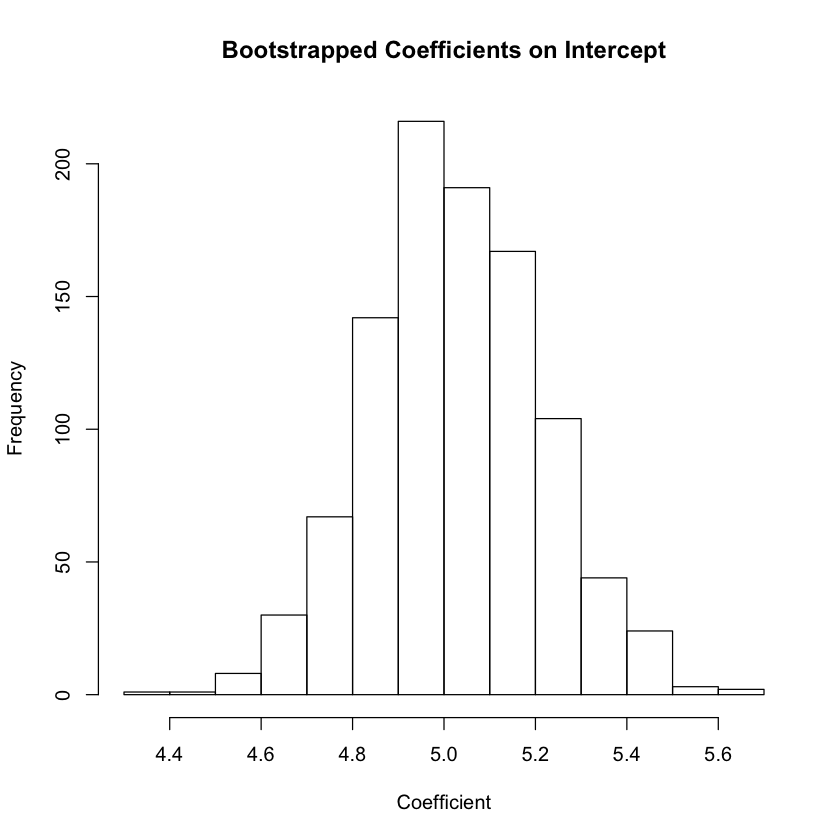

In [75]:
hist(CI_boots[,1], main="Bootstrapped Coefficients on Intercept",xlab="Coefficient",ylab="Frequency")

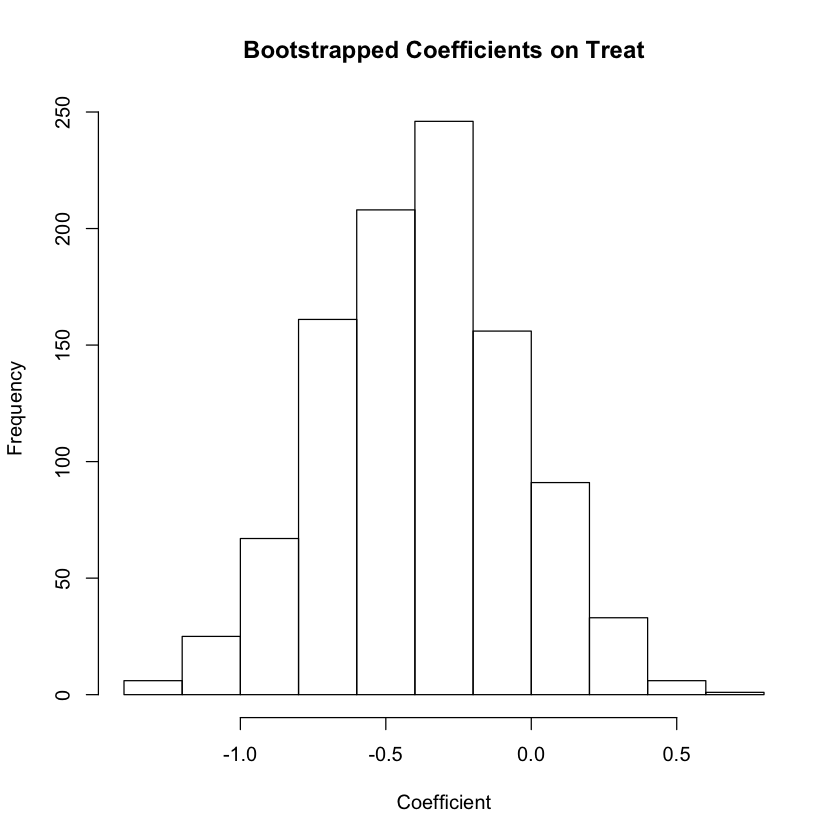

In [45]:
hist(CI_boots[,2], main="Bootstrapped Coefficients on Treat",xlab="Coefficient",ylab="Frequency")

## Getting 95% Confidence Interval from Bootstrapped Coefficients

In [65]:
boots_int = rbind(quantile(CI_boots[,1],probs=c(0.05,0.95)),quantile(CI_boots[,2],probs=c(0.05,0.95)))
colnames(boots_int) <- c("5%", "95%")  
row.names(boots_int) <- c("(Intercept)", "Treat1")  

boots_int
                       

,5%,95%
(Intercept),4.7245664,5.3363636
Treat1,-0.9225967,0.1706392


## Getting 95% Confidence Interval Analytically from Linear Model

In [77]:
mod_PG = lm(weight ~ Treat1, data = PG_noT2)
confint(mod_PG, level = 0.9)

,5 %,95 %
(Intercept),4.6501285,5.4138715
Treat1,-0.9110478,0.1690478


## Interpretation

This dataset has only 20 observations, making any conclusions drawn from it highly uncertain as we're assuming that 20 observations is representative.

That said, the bootstrapped CI and and analytical CI are very similar, showing that the assumptions underlying the analytical model (that the observations are normally distributed) hold.

# Q4

## Defining a R^2 function

In [78]:
# long way
get_rsq <- function(y_act, y_pred) {
    y_bar = mean(y_act)
    tss <- sum((y_act - y_bar)^2)
    rss <- sum((y_act-y_pred)^2)
    return(1-(rss/tss))
}

# short way, hack since using cor func?
get_rsq_hack <- function(y_act, y_pred) {
    return(cor(y_act, y_pred) ^ 2)
}

## Testing using Plant Growth Data

In [79]:
print('testing accuracy up to 10 decimal places...')
weight_pred = predict(mod_PG,PG_noT2)
my_rsq = get_rsq(PG_noT2$weight, weight_pred)
paste('R^2 for the model on modified PG dataset is: ',my_rsq)

if (round(my_rsq,10) == round(as.numeric(summary(mod_PG)[8]),10)){
    print('My func works :)')
} else {
    print('oops')
}

[1] "testing accuracy up to 10 decimal places..."


[1] "R^2 for the model on modified PG dataset is:  0.0730775989903854"

[1] "My func works :)"


# Q5

## Getting and Understanding the nsw dataset

In [69]:
library(foreign) 

nsw <- read.dta("http://www.nber.org/~rdehejia/data/nsw.dta")
treated = ifelse(nsw$treat ==1,"Yes","No")
nsw = data.frame(nsw, treated)
head(nsw)

data_id,treat,age,education,black,hispanic,married,nodegree,re75,re78,treated
Lalonde Sample,1,37,11,1,0,1,1,0,9930.0459,Yes
Lalonde Sample,1,22,9,0,1,0,1,0,3595.8940,Yes
Lalonde Sample,1,30,12,1,0,0,0,0,24909.4492,Yes
Lalonde Sample,1,27,11,1,0,0,1,0,7506.1460,Yes
Lalonde Sample,1,33,8,1,0,0,1,0,289.7899,Yes
Lalonde Sample,1,22,9,1,0,0,1,0,4056.4939,Yes


## Modelling probability of treatment based on the other vars
### (Excluding re78)

In [70]:
# model probability of being assigned to treatment group 

treat_prob_lm = glm(formula = treated ~ age + education + black + hispanic + married + nodegree + re75, family="binomial",data = nsw)


In [71]:
get_treatment_prob <- function(coefs, person) {
  logit <- coefs[1] + person[1]*coefs[2] +
    person[2]*coefs[3] +
    person[3]*coefs[4] + 
    person[4]*coefs[5] +
    person[5]*coefs[6] +
    person[6]*coefs[7] +
    person[7]*coefs[8]
  return(exp(logit) / (1 + exp(logit)))
}

## Using Model to Compare Probability of Treatment for Control and Treatment Groups

In [72]:
nsw_treat = nsw[nsw$treated == "Yes",]
nsw_notreat = nsw[nsw$treated == "No",]

storage.treatment_probs_t <- rep(NA, nrow(nsw_treat)) 
storage.treatment_probs_nt <- rep(NA, nrow(nsw_notreat))                               

for (obs in 1:length(storage.treatment_probs_t)) {
    person <- nsw_treat[obs,c("age","education","black","hispanic","married","nodegree","re75")] 
    storage.treatment_probs_t[obs] <- as.numeric(get_treatment_prob(treat_prob_lm$coef, person))
}

for (obs in 1:length(storage.treatment_probs_nt)) {
    person <- nsw_notreat[obs,c("age","education","black","hispanic","married","nodegree","re75")] 
    storage.treatment_probs_nt[obs] <- as.numeric(get_treatment_prob(treat_prob_lm$coef, person))
}

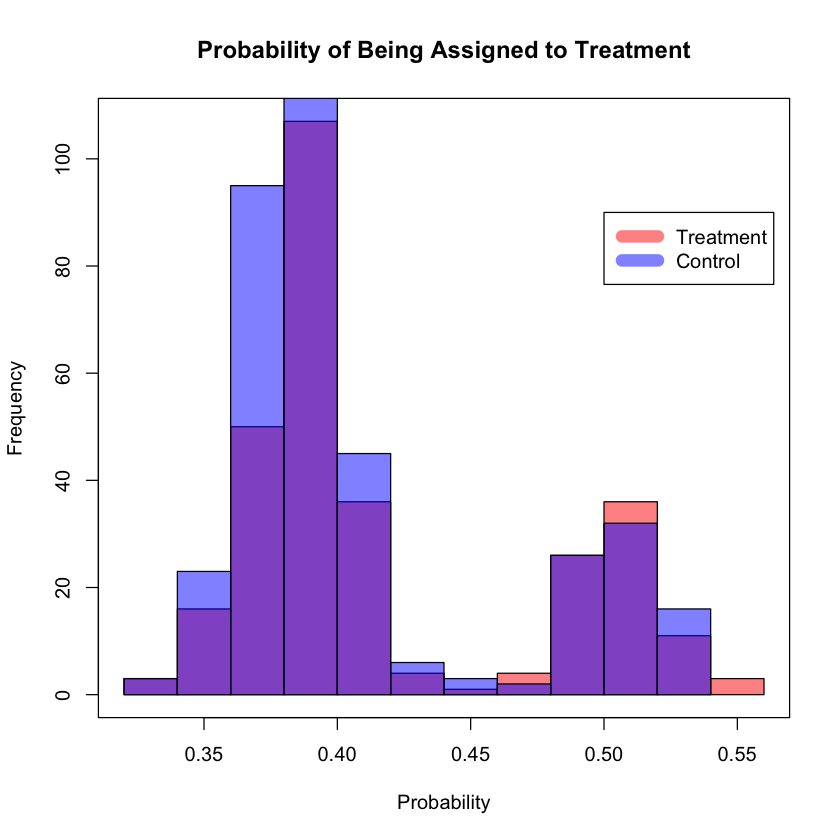

In [73]:
hist(storage.treatment_probs_t, col=rgb(1,0,0,0.5), main="Probability of Being Assigned to Treatment", xlab="Probability")
hist(storage.treatment_probs_nt, col=rgb(0,0,1,0.5), add=T)
legend(0.5, 90, legend=c("Treatment", "Control"),
       col=c(rgb(1,0,0,0.5),rgb(0,0,1,0.5)), lwd=10:10)

box()

## Interpretation

The distributions of probabilities are about the same in both groups, indicating that the treatment assignment was randomized well.

The majority of both distributions is below 0.5, indicating that it is just generally more likely to be assigned to the control group than the treatment group, which makes sense as the control group is larger. However, I am not sure why the distribution is bimodal.